In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
df = pd.read_csv('../data/raw/dataset.csv/depression_data.csv')
df

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


Comprobamos si hay valores nulos

In [214]:
print(df.isnull().sum())

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


# FEATURE ENGINEERING

### TARGET (Chronic Medical Conditions)

Lo primero, trasnformamos a numérica la variable target

In [215]:
df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].replace({'Yes': 1, 'No': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\4141563574.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].replace({'Yes': 1, 'No': 0})


## Variables ordinales binarias (History of Mental Illnes, Family History of Depression, History of Substance Abuse,)

Las puntuaciones que asignemos para las variables ordinales, serán correspondientes con malos hábitos. Es decir, a peor hábito, mayor puntuación.

In [216]:
df['History of Mental Illness'].unique()
df['History of Mental Illness'] = df['History of Mental Illness'].replace({'Yes': 1, 'No': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\159250016.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['History of Mental Illness'] = df['History of Mental Illness'].replace({'Yes': 1, 'No': 0})


In [217]:
df['Family History of Depression'] = df['Family History of Depression'].replace({'Yes': 1, 'No': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\1273082736.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Depression'] = df['Family History of Depression'].replace({'Yes': 1, 'No': 0})


In [218]:
df['History of Substance Abuse'] = df['History of Substance Abuse'].replace({'Yes': 1, 'No': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\3747380085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['History of Substance Abuse'] = df['History of Substance Abuse'].replace({'Yes': 1, 'No': 0})


## EDA-des (Age)

Clasificamos las edades en grupos y hacemos un dummies

In [219]:
def clasificar_edad(df):
    def categorizar_edad(i):
        if 0 < i < 12:
            return 'Childhood'
        elif 12 <= i < 18:
            return 'Adolescence'
        elif 18 <= i < 40:
            return 'Young Adulthood'
        elif 40 <= i < 60:
            return 'Adulthood'
        elif i >= 60:
            return 'Eld'
        
    df['Age_Group'] = df['Age'].apply(categorizar_edad)
    return df

df = clasificar_edad(df)
df.drop(columns = 'Age', inplace = True)

Ahora hacemos un dummies para cada grupo

In [ ]:
dummies_age = pd.get_dummies(df['Age_Group'], prefix='Age')
df = pd.concat([df, dummies_age], axis=1)
df.drop(columns = 'Age_Group', inplace = True)
df.head()

,Name,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Adulthood,Age_Eld,Age_Young Adulthood
0,Christine Barker,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,1,0,1,1,False,False,True
1,Jacqueline Lewis,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,1,0,0,1,True,False,False
2,Shannon Church,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,0,0,1,0,False,True,False
3,Charles Jordan,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,0,0,0,0,True,False,False
4,Michael Rich,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,1,0,1,1,False,False,True


## Actividad física (Physical Activity Level)

Creamos una nueva variable, dando puntuacion a su salud actual según sus hábitos.

In [223]:
df['Physical Activity Level'].unique()

array(['Active', 'Sedentary', 'Moderate'], dtype=object)

In [224]:
df['Physical Activity Level'] = df['Physical Activity Level'].replace({'Active': 0, 'Sedentary' : 10, 'Moderate': 5})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\1065222570.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Physical Activity Level'] = df['Physical Activity Level'].replace({'Active': 0, 'Sedentary' : 10, 'Moderate': 5})


## Tabaquismo (Somking Status)

In [225]:
df['Smoking Status'].unique()

array(['Non-smoker', 'Former', 'Current'], dtype=object)

In [226]:
df['Smoking Status'] = df['Smoking Status'].replace({'Non-smoker': 0, 'Current' : 10, 'Former': 5})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\2666651528.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking Status'] = df['Smoking Status'].replace({'Non-smoker': 0, 'Current' : 10, 'Former': 5})


## Consumo de alcohol (Alcohol Consumption)

In [227]:
df['Alcohol Consumption'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [228]:
df['Alcohol Consumption'] = df['Alcohol Consumption'] .replace({'Low': 0, 'Moderate' : 5, 'High': 10})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\364665000.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Alcohol Consumption'] = df['Alcohol Consumption'] .replace({'Low': 0, 'Moderate' : 5, 'High': 10})


## Hábitos alimenticios (Dietary Habits)

In [229]:
df['Dietary Habits'].unique()

array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object)

In [230]:
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 10, 'Moderate' : 5, 'Healthy': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\3026632639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 10, 'Moderate' : 5, 'Healthy': 0})


## Hábitos del sueño (Sleep Patterns)

In [231]:
df['Sleep Patterns'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [232]:
df['Sleep Patterns'] = df['Sleep Patterns'].replace({'Poor': 10, 'Fair' : 5, 'Good': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\1667113263.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Patterns'] = df['Sleep Patterns'].replace({'Poor': 10, 'Fair' : 5, 'Good': 0})


## SALARIOS (INCOME)

Nos aseguramos que no hay ingresos negativos

In [233]:
if (df['Income'] <= 0).any():
    print("Hay valores cero o negativos en 'Income'. Se necesitan ajustes antes de la transformación.")

Vamos a estudiar los salarios para ver si los dejamos como etsán, los transformamos con logaritmo, o los categorizamos y hacemos dummies.

In [234]:
df['Income'].nunique()

405282

<Axes: ylabel='Income'>

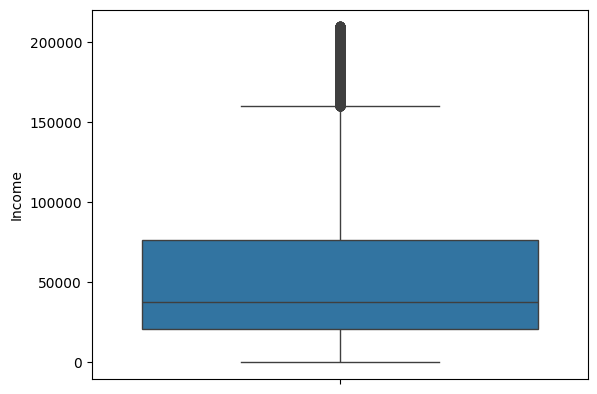

In [235]:
sns.boxplot(df['Income'])

Creemos columnas con ambas propuestas y estudiemoslas comparandolas con la original y frente a la target

In [236]:
df['Log_Income'] = np.log1p(df['Income'])  

In [237]:
df['Range_Income'] = pd.cut(df['Income'], bins=[0, 20000, 50000, 100000, 150000, 200000], labels=['Bajo', 'Medio Bajo', 'Medio', 'Medio Alto', 'Alto'])

<Axes: xlabel='Log_Income', ylabel='Count'>

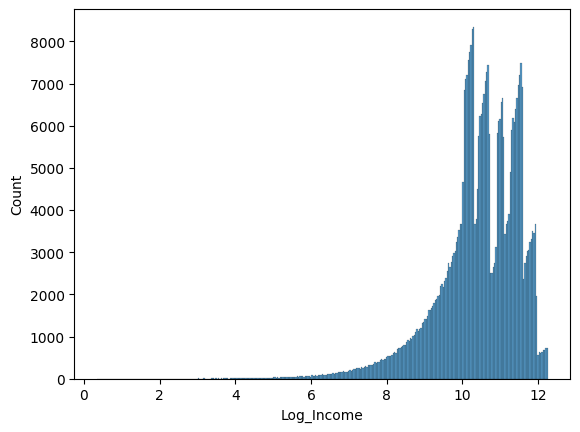

In [238]:
sns.histplot(df['Log_Income'])

<Axes: xlabel='Range_Income'>

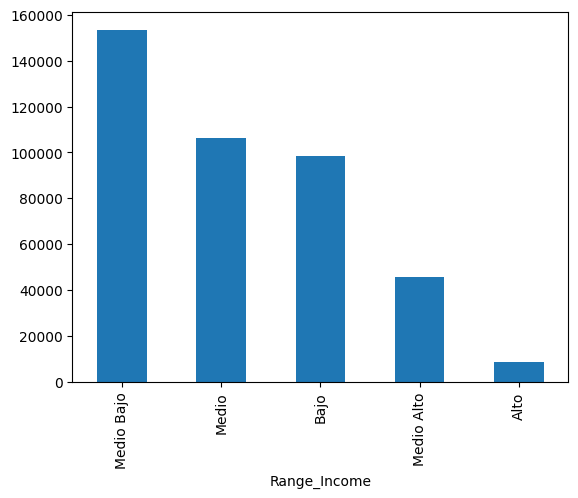

In [239]:
df['Range_Income'].value_counts().plot(kind='bar')

In [240]:
dummies = pd.get_dummies(df['Range_Income'], prefix='Income')
df = pd.concat([df, dummies], axis=1)
df.head()

,Name,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,...,Age_Adulthood,Age_Eld,Age_Young Adulthood,Log_Income,Range_Income,Income_Bajo,Income_Medio Bajo,Income_Medio,Income_Medio Alto,Income_Alto
0,Christine Barker,Married,Bachelor's Degree,2,0,0,Unemployed,26265.67,5,5,...,False,False,True,10.176056,Medio Bajo,False,True,False,False,False
1,Jacqueline Lewis,Married,High School,1,0,10,Employed,42710.36,10,10,...,True,False,False,10.662220,Medio Bajo,False,True,False,False,False
2,Shannon Church,Widowed,Master's Degree,1,0,10,Employed,125332.79,0,10,...,False,True,False,11.738736,Medio Alto,False,False,False,True,False
3,Charles Jordan,Divorced,Master's Degree,3,0,5,Unemployed,9992.78,5,5,...,True,False,False,9.209718,Bajo,True,False,False,False,False
4,Michael Rich,Single,High School,0,0,10,Unemployed,8595.08,0,5,...,False,False,True,9.059062,Bajo,True,False,False,False,False


In [ ]:
sns.pairplot(df[['Income', 'Log_Income', 'Income_Bajo', 'Income_Medio Bajo', 'Income_Medio', 'Income_Medio Alto','Income_Alto','Chronic Medical Conditions']], hue = 'Chronic Medical Conditions')

plt.show()

Observamos que la variable transformada logarítmicamente, `Log_Income`, presenta una distribución continua y una relación más clara y uniforme con otras variables, lo que sugiere una mayor capacidad para capturar patrones graduales en el modelo. Por otro lado, las variables dummies muestran un comportamiento más segmentado y específico, útil para la clasificación pero menos eficaz para representar tendencias continuas, lo que podría resultar en una pérdida de detalle sobre la variabilidad de los ingresos. Por lo tanto, elegimos la variable logarítmica, ya que permite una mejor representación de la variabilidad del ingreso y es más adecuada para modelos que buscan relaciones lineales o continuas, ayudando a evitar el overfitting y optimizando el análisis predictivo.

Eliminamos las variables del dummies y de los rangos

In [242]:
df.columns

Index(['Name', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Age_Adulthood', 'Age_Eld', 'Age_Young Adulthood', 'Log_Income',
       'Range_Income', 'Income_Bajo', 'Income_Medio Bajo', 'Income_Medio',
       'Income_Medio Alto', 'Income_Alto'],
      dtype='object')

In [243]:
df.drop(columns = ['Range_Income', 'Income_Bajo',
       'Income_Medio Bajo', 'Income_Medio', 'Income_Medio Alto',
       'Income_Alto'], inplace = True)

In [244]:
df.head()

,Name,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Adulthood,Age_Eld,Age_Young Adulthood,Log_Income
0,Christine Barker,Married,Bachelor's Degree,2,0,0,Unemployed,26265.67,5,5,5,1,0,1,1,False,False,True,10.176056
1,Jacqueline Lewis,Married,High School,1,0,10,Employed,42710.36,10,10,5,1,0,0,1,True,False,False,10.662220
2,Shannon Church,Widowed,Master's Degree,1,0,10,Employed,125332.79,0,10,0,0,0,1,0,False,True,False,11.738736
3,Charles Jordan,Divorced,Master's Degree,3,0,5,Unemployed,9992.78,5,5,10,0,0,0,0,True,False,False,9.209718
4,Michael Rich,Single,High School,0,0,10,Unemployed,8595.08,0,5,5,1,0,1,1,False,False,True,9.059062


## Estado civil (Marital Status)

Haremos un dummies, ya que un Label Encoder no tiene sentido, ya que no son ordinales.

In [245]:
df['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object)

In [246]:
dummies = pd.get_dummies(df['Marital Status'], prefix='Status')
df = pd.concat([df, dummies], axis=1)
df.drop(columns = 'Marital Status', inplace = True)
df.head()

,Name,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,...,Family History of Depression,Chronic Medical Conditions,Age_Adulthood,Age_Eld,Age_Young Adulthood,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed
0,Christine Barker,Bachelor's Degree,2,0,0,Unemployed,26265.67,5,5,5,...,1,1,False,False,True,10.176056,False,True,False,False
1,Jacqueline Lewis,High School,1,0,10,Employed,42710.36,10,10,5,...,0,1,True,False,False,10.662220,False,True,False,False
2,Shannon Church,Master's Degree,1,0,10,Employed,125332.79,0,10,0,...,1,0,False,True,False,11.738736,False,False,False,True
3,Charles Jordan,Master's Degree,3,0,5,Unemployed,9992.78,5,5,10,...,0,0,True,False,False,9.209718,True,False,False,False
4,Michael Rich,High School,0,0,10,Unemployed,8595.08,0,5,5,...,1,1,False,False,True,9.059062,False,False,True,False


## Nivel académico (Education Level)

Aplicamos otro dummies, ya que aunque las variables vayan en progresión educativa, asignarles valores numéricos aplicaría un sesgo al estar planteándolo desde cuánto afecta a la salud mental, y no hay una relacion objetiva directa ni un orden lógico para este tema

In [247]:
df['Education Level'].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [248]:
dummies_education = pd.get_dummies(df['Education Level'], prefix='Education')
df = pd.concat([df, dummies_education], axis=1)
df.drop(columns = 'Education Level', inplace = True)
df.head()

,Name,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,...,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed,Education_Associate Degree,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD
0,Christine Barker,2,0,0,Unemployed,26265.67,5,5,5,1,...,10.176056,False,True,False,False,False,True,False,False,False
1,Jacqueline Lewis,1,0,10,Employed,42710.36,10,10,5,1,...,10.662220,False,True,False,False,False,False,True,False,False
2,Shannon Church,1,0,10,Employed,125332.79,0,10,0,0,...,11.738736,False,False,False,True,False,False,False,True,False
3,Charles Jordan,3,0,5,Unemployed,9992.78,5,5,10,0,...,9.209718,True,False,False,False,False,False,False,True,False
4,Michael Rich,0,0,10,Unemployed,8595.08,0,5,5,1,...,9.059062,False,False,True,False,False,False,True,False,False


## Estado laboral (Employment Status)

De nuevo, convertimos a numéica esta variable binaria

In [249]:
df['Employment Status'].unique()

array(['Unemployed', 'Employed'], dtype=object)

In [250]:
df['Employment Status'] = df['Employment Status'].replace({'Unemployed': 1, 'Employed' : 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_18032\4086797478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Employment Status'] = df['Employment Status'].replace({'Unemployed': 1, 'Employed' : 0})


In [251]:
df.head()

,Name,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,...,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed,Education_Associate Degree,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD
0,Christine Barker,2,0,0,1,26265.67,5,5,5,1,...,10.176056,False,True,False,False,False,True,False,False,False
1,Jacqueline Lewis,1,0,10,0,42710.36,10,10,5,1,...,10.662220,False,True,False,False,False,False,True,False,False
2,Shannon Church,1,0,10,0,125332.79,0,10,0,0,...,11.738736,False,False,False,True,False,False,False,True,False
3,Charles Jordan,3,0,5,1,9992.78,5,5,10,0,...,9.209718,True,False,False,False,False,False,False,True,False
4,Michael Rich,0,0,10,1,8595.08,0,5,5,1,...,9.059062,False,False,True,False,False,False,True,False,False


Veamos si está balanceada la variable objetivo

In [252]:
proporcion = df['Chronic Medical Conditions'].value_counts(normalize=True) * 100
print("Proporciones (%):")
print(proporcion)

Proporciones (%):
Chronic Medical Conditions
0    67.081311
1    32.918689
Name: proportion, dtype: float64


Vemos que está un poco desbalanceada, pero es lógico ya que la cronificación de la depresión no es lo usual, y quizá son valores suficientes para el entreno. No obstante, en el notebook de modelos, trataremos los datos del train para que tenga un buen entreno, pero sin modificar los registros originales.

Eliminamos los nombres porque no aportan nada

In [253]:
df.drop(columns = 'Name', inplace = True)

In [254]:
df.head()

,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,...,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed,Education_Associate Degree,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD
0,2,0,0,1,26265.67,5,5,5,1,0,...,10.176056,False,True,False,False,False,True,False,False,False
1,1,0,10,0,42710.36,10,10,5,1,0,...,10.662220,False,True,False,False,False,False,True,False,False
2,1,0,10,0,125332.79,0,10,0,0,0,...,11.738736,False,False,False,True,False,False,False,True,False
3,3,0,5,1,9992.78,5,5,10,0,0,...,9.209718,True,False,False,False,False,False,False,True,False
4,0,0,10,1,8595.08,0,5,5,1,0,...,9.059062,False,False,True,False,False,False,True,False,False


Movemos la variable target al final y, de paso, la llamamos así

In [255]:
df['Target'] = df['Chronic Medical Conditions']
df.drop(columns='Chronic Medical Conditions', inplace = True)

In [256]:
df.head()

,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,...,Status_Divorced,Status_Married,Status_Single,Status_Widowed,Education_Associate Degree,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD,Target
0,2,0,0,1,26265.67,5,5,5,1,0,...,False,True,False,False,False,True,False,False,False,1
1,1,0,10,0,42710.36,10,10,5,1,0,...,False,True,False,False,False,False,True,False,False,1
2,1,0,10,0,125332.79,0,10,0,0,0,...,False,False,False,True,False,False,False,True,False,0
3,3,0,5,1,9992.78,5,5,10,0,0,...,True,False,False,False,False,False,False,True,False,0
4,0,0,10,1,8595.08,0,5,5,1,0,...,False,False,True,False,False,False,True,False,False,1


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Number of Children            413768 non-null  int64  
 1   Smoking Status                413768 non-null  int64  
 2   Physical Activity Level       413768 non-null  int64  
 3   Employment Status             413768 non-null  int64  
 4   Income                        413768 non-null  float64
 5   Alcohol Consumption           413768 non-null  int64  
 6   Dietary Habits                413768 non-null  int64  
 7   Sleep Patterns                413768 non-null  int64  
 8   History of Mental Illness     413768 non-null  int64  
 9   History of Substance Abuse    413768 non-null  int64  
 10  Family History of Depression  413768 non-null  int64  
 11  Age_Adulthood                 413768 non-null  bool   
 12  Age_Eld                       413768 non-nul

Exportamos el csv procesado

In [258]:
df.to_csv('../data/processed/df_procesado.csv')